# Métodos Lineales para Regresión

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## (a) Importe y Visualización del Dataset
> Podemos imprimir los primeros valores del dataset con la función *Head( )*, antes y despues de aplicado el comando drop.

In [42]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [51]:
df.drop(['id','date','zipcode',], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


> La función *drop( )* elimina las columnas mencionadas como argumento, del dataset, este proceso es parte de la limpieza inicial de todo dataset, donde se debe preparar el mismo para su análisis.

## (b) Descripcion del Dataset

> La función *.shape( )* permite conocer las dimensiones del dataset, en este caso, luego de haber eliminado las variables no utilizadas para el análisis: <br>
- **Número de filas:** 21613 <br>
- **Número de columnas:** 18

In [52]:
df.shape

(21613, 18)

> La función *info()* entrega un resumen general de las columnas del dataset, la cantidad de filas de cada una y el tipo de dato que almacena. Para el dataset kc_house_data utilizado, la mayoría de las columnas están formateadas para almacenar registros de tipo entero de 64 bits de largo de registro y punto flotante del mismo largo. Adicionalmente la cantidad de memoria utilizada para almacenar el dataset es de 3.5MB aprox.<br>
<br>
Gran parte de las columnas del dataset corresponden a **variables numéricas discretas**, las cuales entregan información sobre propiedades consideradas de relevancia para poder determinar el precio en el mercado de una vivienda.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


> La función *.describe( )* entrega estadísiticos de tendencia y dispersión de las variables del dataset, además se hace un redondeo a dos cifras decimales para mejor lectura de los valores. <br>


In [57]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,47.78,-121.32,6210.00,871200.00


> A partir de la tabla de resumen de estadísticos obtenida podemos empezar a notar algunas cosas interesantes:
- La media de la variable precio cae cerca de las 540000 unidades monetarias y el tercer cuartíl cerca de las 645000, sin embargo, el precio máximo es de 7700000 unidades monetarias. Un comportamiento similar se observa en las variables *bedrooms* (habitaciones), *bathrooms* (número de baños), *sqft_living* (pies cuadrados hábiles de la vivienda) y *sqft_lot* (pies cuadrados del terreno de construcción), este comportamiento sugiere la existencia de un grupo de ouliers, viviendas con un alto valor monetario respaldado por propiedades de las mismas considerablemente superiores a las de los tres primeros cuartiles del dataset.
- El 75% de las viviendas fueron construidas dentro de los años 1900 y 1997, siendo la mediana el año 1975, sobre esto, un 25% de las viviendas se construyeron entre los años 1997 y 2015 pudiendo explicar parte de la gran diferencia de precio entre un pequeño conjunto de viviendas.
- El 75% de las viviendas posee un puntaje de condición (variable *condition*) de 4.00, lo que sugiere que en general todas las viviendas medidas en el dataset se encontraban en buen estado.
- Es interesante notar que la media la variable *sqft_living* (pies cuadrados hábiles de la vivienda) es menor en comparación con el valor de la misma variable, para la medición realizada el año 2015, sin embargo, la cantiad de viviendas medidas es la misma (2163), o mismo sucede con la variable *sqft_lot* (pies cuadrados del terreno de construcción). Se sabe que el valor de las variables *sqft_living15* y *sqft_lot15* son los valores medidos el año 2015, en los cuales se incluye las remodelaciones realizadas a la vivienda. La disminución de los valores del par de variables sugiere que interesantemente, aunque la cantidad de viviendas no cambió, producto de las remodelaciones si disminuyó la superficie de terreno de construcción y de vivienda.

## (c) Normalización de Datos

> Escalar una variable permite ajustar su rango de valores a un rango acotado predefinido, este tipo de preprocesamiento se utiliza cuando el modelo que se tiene es sensible a magnitudes, en nuestro caso, la variable objetivo para la regresión es *price*, la cual presenta rangos de valores en magnitudes demasiado distintas en comparación a los atributos con los que alimentaremos el modelo, como el número de baños (rango 0-8), el número de habitaciones (rango 0-33), etc. Si no se escala la variable, se generará un modelo en el cual, al aumentar en un pequeño diferencial el atributo (*feature*), la variable objetivo de la predicción experimentará un aumento considerable.<br>
<br>
Es interesante notar que algunos algoritmos pueden mejorar considerablemente su rapidez de convergencia con datos normalizados (SVM, por ejemplo). En nuestro caso, **puesto que se realizará una regresión lineal de mínimos cuadrados, la normalización no tiene mayor efecto**, pues no varía la correlación de los coeficientes al ser términos lineales, no siendo el caso si usásemos un algoritmo basado en coeficientes no lineales. Podemos ver como la dispersión de los valores de la variable se reduce notablemente:


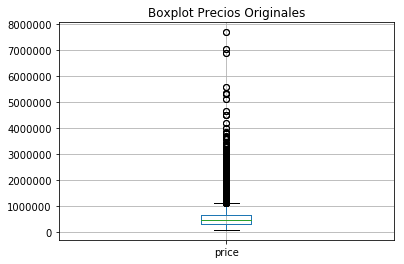

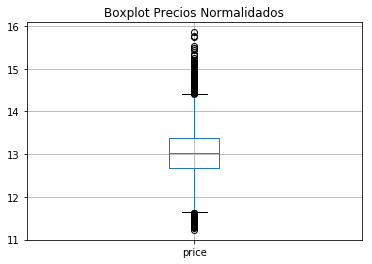

In [138]:
df.boxplot(column = ['price'], return_type = 'axes')
plt.title('Boxplot Precios Originales');
plt.show()
# Normalizamos la variable precio
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['price'] = np.log(df['price'])
df_scaled.boxplot(column = ['price'], return_type = 'axes')
plt.title('Boxplot Precios Normalidados')
plt.show()

> La normalización de variables en un dataset se utiliza, por lo general, cuando necesitamos aplicar un proceso que requiere normalidad en la variable. Podemos observar los histogramas de la variable precio antes y despues de normalizarla:

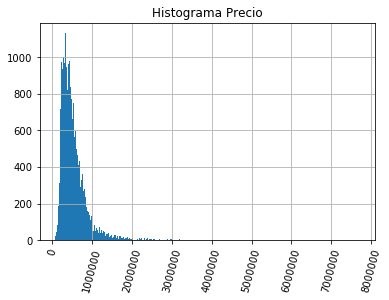

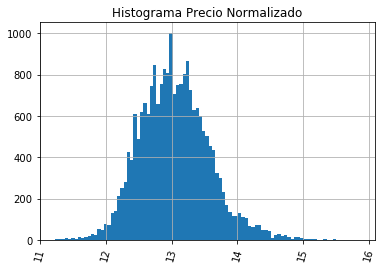

In [143]:
df.hist(column= ['price'], bins = 'fd', xrot = 75)
plt.title('Histograma Precio')
# Normalizamos la variable precio
df_scaled.hist(column=['price'], bins = 'fd', xrot = 75)
plt.title('Histograma Precio Normalizado')
plt.show()

> Por último, señalar que el término 'Normalizar' tiene connotaciones distintas dependiendo del problema, en ciertos contextos se le trata como una estandarización, el cual no modifica la distribución de la variable en cuestión, mientras que en otros si se modifica la distirbución para centrar al rededor de la media y acotar la varianza a 1, por lo general para aplicar procesos que requieren normalidad. En nuestro caso, lo que logramos es hacer que el coeficiente constante de la regresión ($a_0$) sea igual a la media de $y$ (correspondiente a la variable *precio*), al estar esta última centrada en su media producto de nuestra normalización y transformación, el intercepto de la regresión ($a_o$) será necesariamente igual a cero, en otras palabras, logramos hacer que el intercepto de la regresión esté en (0,0):
$$y = a_0 + x_i\cdot a$$
Puesto que la normalización no afecta la correlación de los coeficientes de la regresión, su utilidad solo está en la intepretación de los coeficientes obtenidos.